In [1]:
import PIL.Image
import numpy as np
from typing import Union
from glob import glob
import pandas as pd
import os
from treys import Card
from termcolor import colored
from utils import eval_listof_games, debug_listof_games, save_results, load_results

# homemade stuff
from preprocessing import *
from test import *

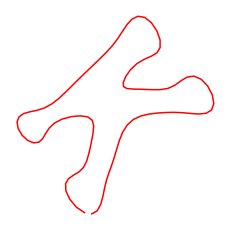

In [2]:
# demo : extract the average contour for a certain card value
card='K'
nb_descr = 30
avg_descr, avg_cont = make_avg_descr(card, nb_descr, make_contour=True)
for char in card : 
    plt.plot(avg_cont[char][:,1], -avg_cont[char][:,0], 'r')
plt.axis('image')
plt.axis('off')
plt.show()

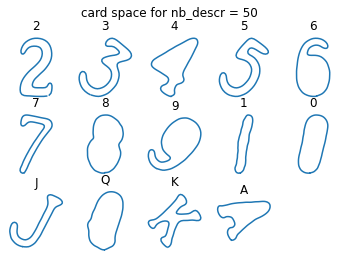

In [3]:
# make the "card space"

nb_descr = 50
card_space = make_card_space(nb_descr=nb_descr)

show_card_space(card_space)
plt.show()

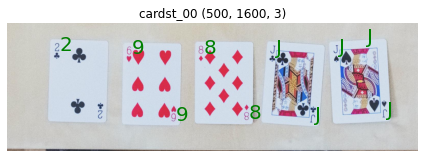

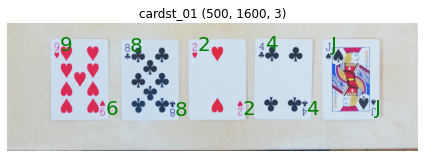

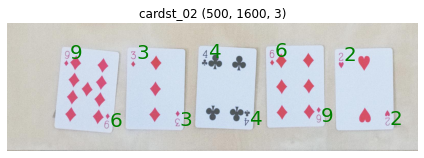

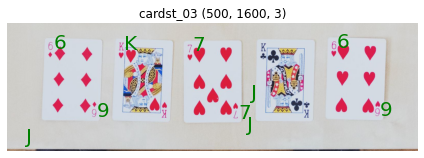

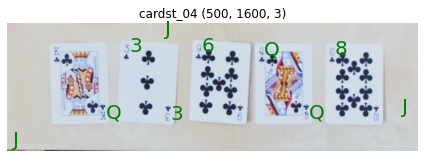

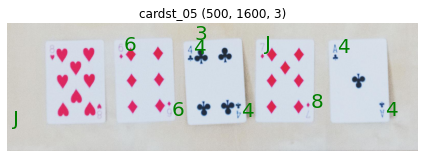

In [4]:
#evaluate the cards in a given list

cards_list = range(6) # [0, 2, 3, 4, 5, 7, 8, 9]
cards_name = 'cardst'
for n in cards_list :
    img = get_img(n, cards_name)
    card_vals = detect_card_vals(img, card_space, thresh=.2, nb_vals=10)

    # print results
    show_img(img, "{}_{}".format(cards_name, str(n).zfill(2)))
    for val in card_vals :
        plt.text(val[1][1]+10, val[1][0]+10, val[0], color='g', size=20)
    plt.show()
    